In [58]:
#pragma dataset init k_hairstyle --size 100Gb

from cloud_ml.storage.api import Storage
import tarfile
from os import remove

# To retrieve application id and secret:
# 1. Go to link: https://oauth.yandex.ru/client/new
# 2. Choose 'Web services'
# 3. Paste into 'Callback URI': https://oauth.yandex.ru/verification_code
# 4. Set up permissions on yandex disk
application_id = ''
application_secret = ''
disk = Storage.ya_disk(application_id=application_id, application_secret=application_secret)
# downloading contents of the remote file into the local one
disk.get('/annotation.pkl', '/home/jupyter/mnt/datasets/k_hairstyle/annotation.pkl')
print('downloaded annotation')

disk.get('/annotation_mask.pkl', '/home/jupyter/mnt/datasets/k_hairstyle/annotation_mask.pkl')
print('downloaded annotation mask')

disk.get('/k_hairstyle.tar.gz', '/home/jupyter/mnt/datasets/k_hairstyle/k_hairstyle.tar.gz')
print('downloaded tar')

tar = tarfile.open('/home/jupyter/mnt/datasets/k_hairstyle/k_hairstyle.tar.gz', 'r:gz')
tar.extractall('/home/jupyter/mnt/datasets/k_hairstyle/')
tar.close()

remove('/home/jupyter/mnt/datasets/k_hairstyle/k_hairstyle.tar.gz')

del tar

Enter the confirmation code:  2695207


/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: disk
  warnings.warn(message)


Open the following url to obtain confirmation code: https://oauth.yandex.ru/authorize?response_type=code&client_id=6bfd537b63fc4b1791005d4bfb257eba&display=popup&force_confirm=yes
downloaded annotation
downloaded annotation mask
downloaded tar
Mounting dataset k_hairstyle... /home/jupyter/mnt/datasets/k_hairstyle


Task is done, waiting for foreground cells to finish...


It's init dataset task. State result won't be merged.


In [59]:
import os

files = os.listdir('/home/jupyter/mnt/datasets/k_hairstyle/partition1/images')

print(len(files))

24273


In [166]:
import pandas as pd

In [167]:
annot = pd.read_pickle('/home/jupyter/mnt/datasets/k_hairstyle/annotation.pkl')

In [68]:
import pickle

In [71]:
with open('/home/jupyter/mnt/datasets/k_hairstyle/annotation.pkl', 'rb') as f:
    annot = pickle.load(f)

In [74]:
type(annot)

pandas.core.frame.DataFrame

In [75]:
pd.__version__

'0.25.3'

In [76]:
%pip install -U pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.7 MB 3.0 MB/s            
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [78]:
import pandas as pd
pd.__version__

'1.4.1'

In [168]:
annot = pd.read_pickle('/home/jupyter/mnt/datasets/k_hairstyle/annotation.pkl')

In [169]:
annot.color.unique()

array(['yellowish brown', 'natural brown', 'black', 'reddish brown',
       'others', 'two-tone', 'ash brown', 'Ombre', 'pink-brown'],
      dtype=object)

In [170]:
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

In [87]:
annot.head()

id    source  \
0  780020e4-823e-4813-bec8-fd1d38d6c4ce  AP054876   
1  e99830af-367c-44ed-8cca-1eac9e613e58  AP054876   
2  e64391d7-2d91-4590-8409-75f2b42abf7e  AP054876   
3  0bcb89f7-be9a-4b10-8cbe-6d369fb19ff9  AP054876   
4  5291b872-1b5a-41f6-b13f-d28ed905a27d  AP054876   

                                 path      basestyle basestyle_type length  \
0  partition1/images/AP054876-001.jpg  other layered           long   long   
1  partition1/images/AP054876-002.jpg  other layered           long   long   
2  partition1/images/AP054876-003.jpg  other layered           long   long   
3  partition1/images/AP054876-004.jpg  other layered           long   long   
4  partition1/images/AP054876-005.jpg  other layered           long   long   

  curl         bang  loss  side  ... partition exceptional  front horizontal  \
0    C  see-through  None  None  ...      None        None   True          0   
1    C  see-through  None  None  ...      None        None  False         12   
2    C  see-through  None  None  ...      None        None  False         24   
3    C  see-through  None  None  ...      None        None  False         36   
4    C  see-through  None  None  ...      None        None  False         48   

   vertical  age  gender  height width  before-after  
0     upper   32  female     512   512        before  
1     upper   32  female     512   512        before  
2     upper   32  female     512   512        before  
3     upper   32  female     512   512        before  
4     upper   32  female     512   512        before  

[5 rows x 22 columns]

In [171]:
import os

In [172]:
root = '/home/jupyter/mnt/datasets/k_hairstyle/'
rel_dir = 'partition1/images'
rel_paths = [os.path.join(rel_dir, file) for file in os.listdir(os.path.join(root, rel_dir))]

In [173]:
len(rel_paths)

24273

In [174]:
df = annot[annot['path'].isin(rel_paths)]

In [175]:
df.shape

(24273, 22)

In [176]:
paths = df.path.tolist()
colors = df.color.tolist()

In [177]:
unique_colors = set(colors)

In [178]:
color2idx = {
    color: idx
    for idx, color in enumerate(unique_colors)
}
idx2color = {
    idx: color
    for color, idx in color2idx.items()
}

In [179]:
color2idx

{'Ombre': 0,
 'black': 1,
 'reddish brown': 2,
 'ash brown': 3,
 'others': 4,
 'two-tone': 5,
 'yellowish brown': 6,
 'pink-brown': 7,
 'natural brown': 8}

In [97]:
idx2color == dict(zip(color2idx.values(), color2idx.keys()))

True

In [180]:
labels = [color2idx[color] for color in colors]

In [181]:
import numpy as np

In [182]:
labels = np.array(labels)

In [183]:
def showImagesHorizontally(images, figsize=(16, 16), title=None):
    fig = plt.figure(figsize=figsize)
    for i in range(len(images)):
        a = fig.add_subplot(1, len(images), i + 1)
        image = images[i]
        if title is not None:
            plt.title(title)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [102]:
annot.columns

Index(['id', 'source', 'path', 'basestyle', 'basestyle_type', 'length', 'curl',
       'bang', 'loss', 'side', 'color', 'rgb', 'partition', 'exceptional',
       'front', 'horizontal', 'vertical', 'age', 'gender', 'height', 'width',
       'before-after'],
      dtype='object')

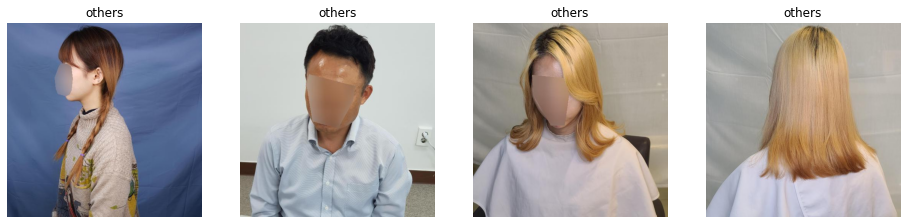

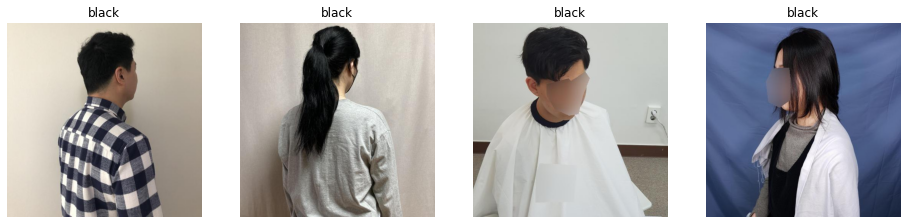

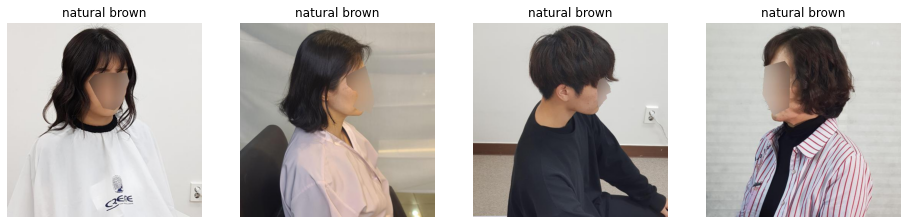

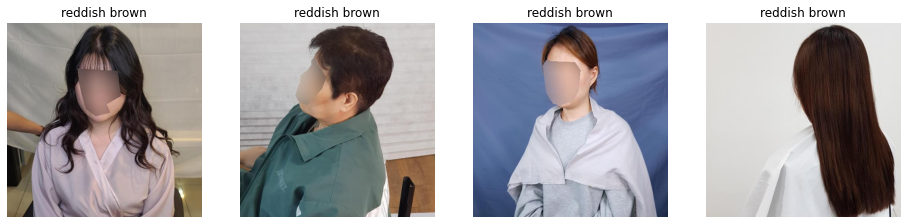

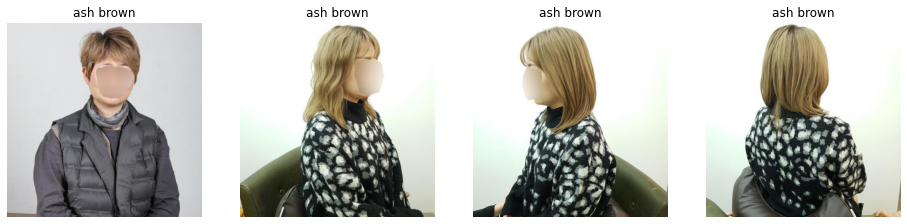

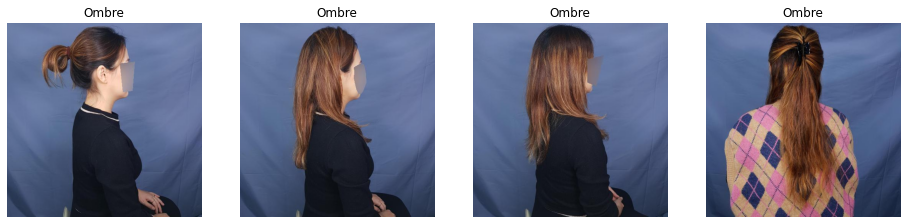

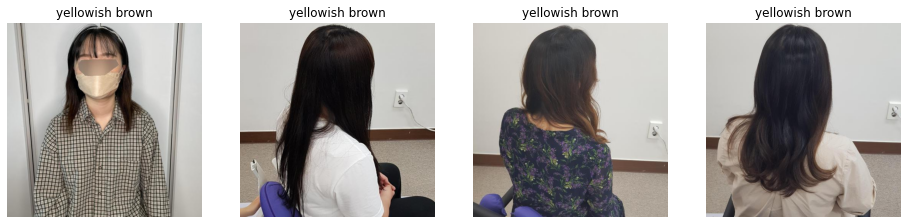

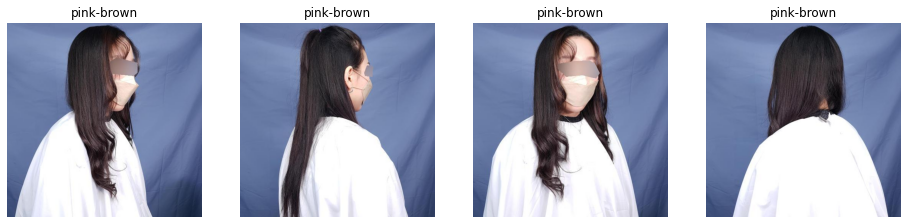

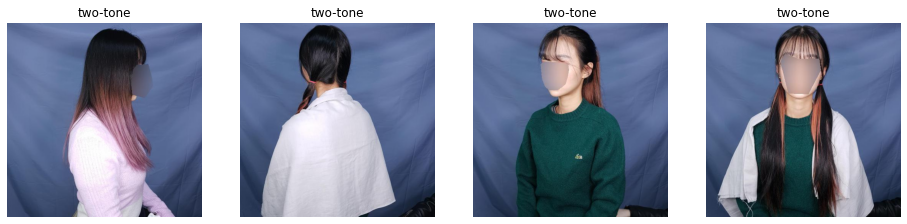

In [62]:
def get_random_image(paths, labels, label):
    inds = np.where(labels == label)[0]
    idx = np.random.choice(inds)
    path = paths[idx]
    abs_path = os.path.join(root, path)
    image = Image.open(abs_path).convert('RGB')
    return image


for label in range(len(unique_colors)):
    images = [get_random_image(paths, labels, label) for _ in range(4)]
    showImagesHorizontally(images, title=idx2color[label])

In [63]:
#pragma dataset init k_hairstyle_full --size 100Gb

from cloud_ml.storage.api import Storage
import tarfile
from os import remove

# To retrieve application id and secret:
# 1. Go to link: https://oauth.yandex.ru/client/new
# 2. Choose 'Web services'
# 3. Paste into 'Callback URI': https://oauth.yandex.ru/verification_code
# 4. Set up permissions on yandex disk
application_id = ''
application_secret = ''
disk = Storage.ya_disk(application_id=application_id, application_secret=application_secret)
# downloading contents of the remote file into the local one
disk.get('/k_hairstyle/annotation.pkl', '/home/jupyter/mnt/datasets/k_hairstyle_full/annotation.pkl')
print('downloaded annotation')

disk.get('/k_hairstyle/annotation_mask.pkl', '/home/jupyter/mnt/datasets/k_hairstyle_full/annotation_mask.pkl')
print('downloaded annotation mask')

for i in range(1, 23):
    disk.get(f'/k_hairstyle/partition{i}.tar.gz', f'/home/jupyter/mnt/datasets/k_hairstyle_full/partition{i}.tar.gz')
print('downloaded tar')

for i in range(1, 23):
    tar = tarfile.open(f'/home/jupyter/mnt/datasets/k_hairstyle_full/partition{i}.tar.gz', 'r:gz')
    tar.extractall('/home/jupyter/mnt/datasets/k_hairstyle_full/')
    tar.close()
    remove(f'/home/jupyter/mnt/datasets/k_hairstyle_full/partition{i}.tar.gz')

del tar, i, disk

Background cell scheduled. Waiting for foreground cells to finish commits


Preparing c1.4 instance...


c1.4 instance is ready, running task...


Enter the confirmation code:  8192276
Open the following url to obtain confirmation code: https://oauth.yandex.ru/authorize?response_type=code&client_id=6bfd537b63fc4b1791005d4bfb257eba&display=popup&force_confirm=yes
downloaded annotation
downloaded annotation mask
downloaded tar
Mounting dataset k_hairstyle_full... /home/jupyter/mnt/datasets/k_hairstyle_full


Task is done, waiting for foreground cells to finish...


It's init dataset task. State result won't be merged.


In [82]:
#!:bash
ls -allh expr/checkpoints/ 

total 4.7G
drwxr-xr-x 1 jupyter jupyter  432 Mar 17 06:20 .
drwxr-xr-x 1 jupyter jupyter   36 Mar  9 23:27 ..
-rw-r--r-- 1 jupyter jupyter 315M Mar 13 18:04 050000_nets.ckpt
-rw-r--r-- 1 jupyter jupyter 235M Mar 13 18:05 050000_nets_ema.ckpt
-rw-r--r-- 1 jupyter jupyter 629M Mar 13 18:05 050000_optims.ckpt
-rw-r--r-- 1 jupyter jupyter 315M Mar 16 00:41 060000_nets.ckpt
-rw-r--r-- 1 jupyter jupyter 235M Mar 16 00:41 060000_nets_ema.ckpt
-rw-r--r-- 1 jupyter jupyter 629M Mar 16 00:41 060000_optims.ckpt
-rw-r--r-- 1 jupyter jupyter 315M Mar 16 15:30 080000_nets.ckpt
-rw-r--r-- 1 jupyter jupyter 235M Mar 16 15:30 080000_nets_ema.ckpt
-rw-r--r-- 1 jupyter jupyter 629M Mar 16 15:31 080000_optims.ckpt
-rw-r--r-- 1 jupyter jupyter 315M Mar 17 06:20 100000_nets.ckpt
-rw-r--r-- 1 jupyter jupyter 235M Mar 17 06:20 100000_nets_ema.ckpt
-rw-r--r-- 1 jupyter jupyter 629M Mar 17 06:20 100000_optims.ckpt


In [83]:
#!:bash
cp expr/checkpoints/100000_nets_ema.ckpt ./

In [103]:
unique_colors

{'Ombre',
 'ash brown',
 'black',
 'natural brown',
 'others',
 'pink-brown',
 'reddish brown',
 'two-tone',
 'yellowish brown'}

In [184]:
def get_random_image(paths, labels, label, return_path=False):
    inds = np.where(labels == label)[0]
    idx = np.random.choice(inds)
    path = paths[idx]
    abs_path = os.path.join(root, path)
    image = Image.open(abs_path).convert('RGB')
    if return_path:
        return image, abs_path
    return image

In [114]:
unique_colors

{'Ombre',
 'ash brown',
 'black',
 'natural brown',
 'others',
 'pink-brown',
 'reddish brown',
 'two-tone',
 'yellowish brown'}

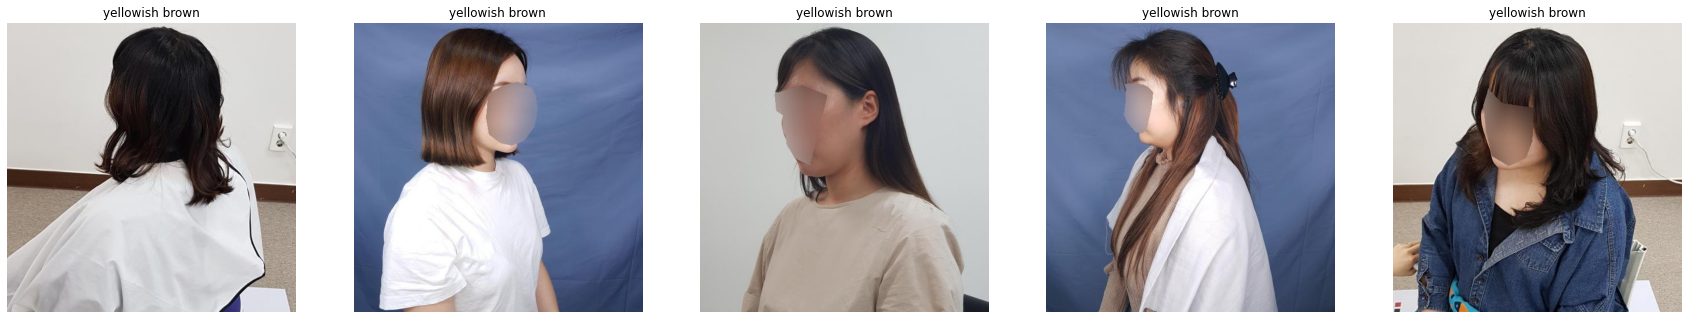

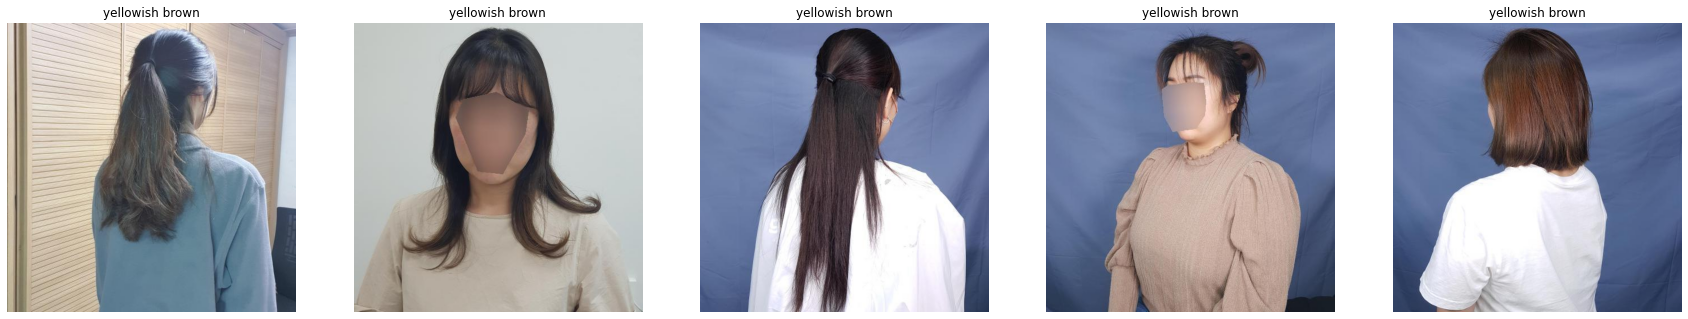

In [185]:
color = 'yellowish brown'
label = color2idx[color]

local_paths = []
images = []
for _ in range(10):
    image, path = get_random_image(paths, labels, label, True)
    images.append(image)
    local_paths.append(path)
showImagesHorizontally(images[:5], figsize=(30, 30), title=color)
showImagesHorizontally(images[5:], figsize=(30, 30), title=color)

In [186]:
import os
from shutil import copy2

In [187]:
from tqdm import tqdm

In [193]:
path

'/home/jupyter/mnt/datasets/k_hairstyle/partition1/images/CP050303-015.jpg'

In [194]:
root = '/home/jupyter/mnt/datasets/k_hairstyle'

In [196]:
n2n = {
    'Ombre': 'ombre',
    'ash brown': 'ash_brown',
    'black': 'black',
    'natural brown': 'natural_brown',
    'pink-brown': 'pink_brown',
    'reddish brown': 'reddish_brown',
    'yellowish brown': 'yellowish_brown'
}

saveroot = 'image_folder_2'
for color, folder in tqdm(n2n.items(), total=len(n2n)):
    os.makedirs(os.path.join(saveroot, folder), exist_ok=True)
    label = color2idx[color]

    local_paths = []
    images = []
    for idx in range(50):
        image, path = get_random_image(paths, labels, label, True)
#         images.append(image)
#         local_paths.append(path)
        copy2(path, os.path.join(saveroot, folder, f'{folder}_{idx}.jpg'))

100%|██████████| 7/7 [00:02<00:00,  2.47it/s]


In [155]:
local_paths[6]

'/home/jupyter/mnt/datasets/k_hairstyle/partition1/images/CP202567-013.jpg'

In [149]:
annot[annot['path'] == 'partition1/images/CP194582-011.jpg'].iloc[0].color

'pink-brown'

In [156]:
test_images = [
    {'color': 'Ombre', 'path': '/home/jupyter/mnt/datasets/k_hairstyle/partition1/images/CP212576-028.jpg'},
    {'color': 'ash brown', 'path': '/home/jupyter/mnt/datasets/k_hairstyle/partition1/images/CP076337-009.jpg'},
    {'color': 'black', 'path': '/home/jupyter/mnt/datasets/k_hairstyle/partition1/images/AP074052-003.jpg'},
    {'color': 'natural brown', 'path': '/home/jupyter/mnt/datasets/k_hairstyle/partition1/images/AP068316-156.jpg'},
    {'color': 'pink-brown', 'path': '/home/jupyter/mnt/datasets/k_hairstyle/partition1/images/CP194582-011.jpg'},
    {'color': 'reddish brown', 'path': '/home/jupyter/mnt/datasets/k_hairstyle/partition1/images/AP134753-042.jpg'},
    {'color': 'yellowish brown', 'path': '/home/jupyter/mnt/datasets/k_hairstyle/partition1/images/CP202567-013.jpg'}
]

In [158]:
pd.to_pickle(test_images, 'test_images_annot.pkl')

In [159]:
from copy import copy

In [160]:
from shutil import copy2

In [161]:
import os

In [162]:
os.makedirs('test_images')

In [164]:
for test_image in test_images:
    copy2(test_image['path'], 'test_images')

In [165]:
root = '/home/jupyter/mnt/datasets/k_hairstyle_full/'
annot = pd.read_pickle('/home/jupyter/mnt/datasets/k_hairstyle/annotation.pkl')
df = annot[(annot.color != 'two-tone') & (annot.color != 'others')]
df = df.sample(frac=1)

paths = df.path.tolist()
colors = df.color.tolist()

unique_colors = set(colors)

color2idx = {
    color: idx
    for idx, color in enumerate(unique_colors)
}

idx2color = {
    idx: color
    for color, idx in color2idx.items()
}

color2idx

{'Ombre': 0,
 'black': 1,
 'reddish brown': 2,
 'ash brown': 3,
 'pink-brown': 4,
 'natural brown': 5,
 'yellowish brown': 6}

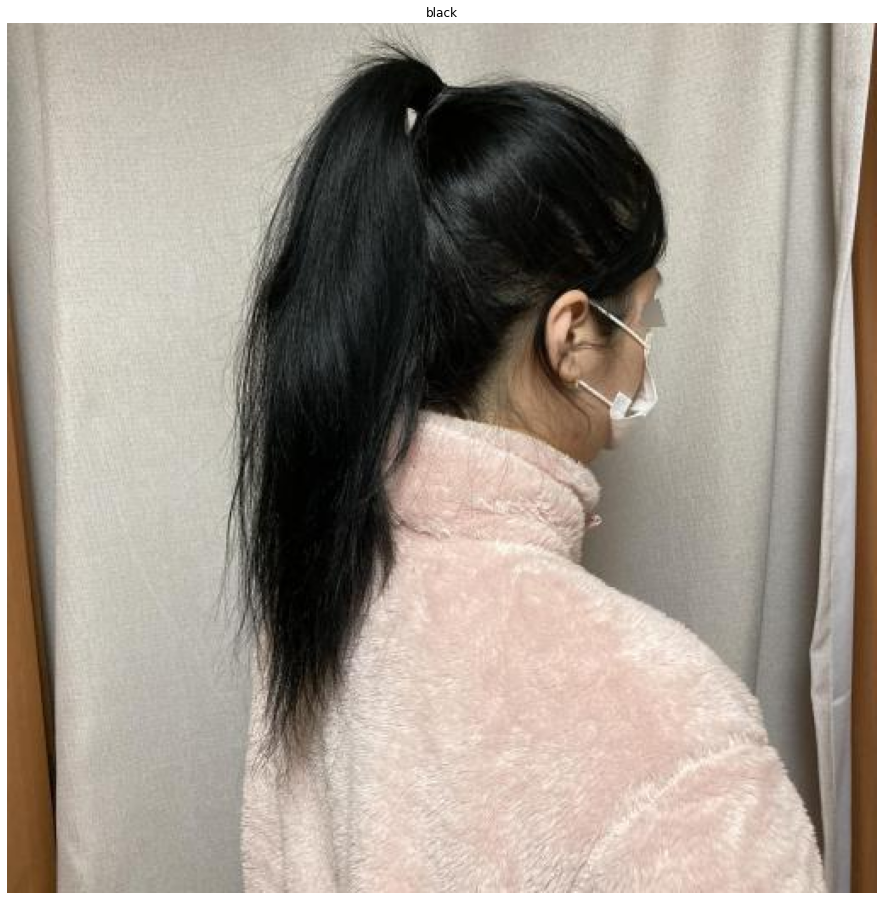

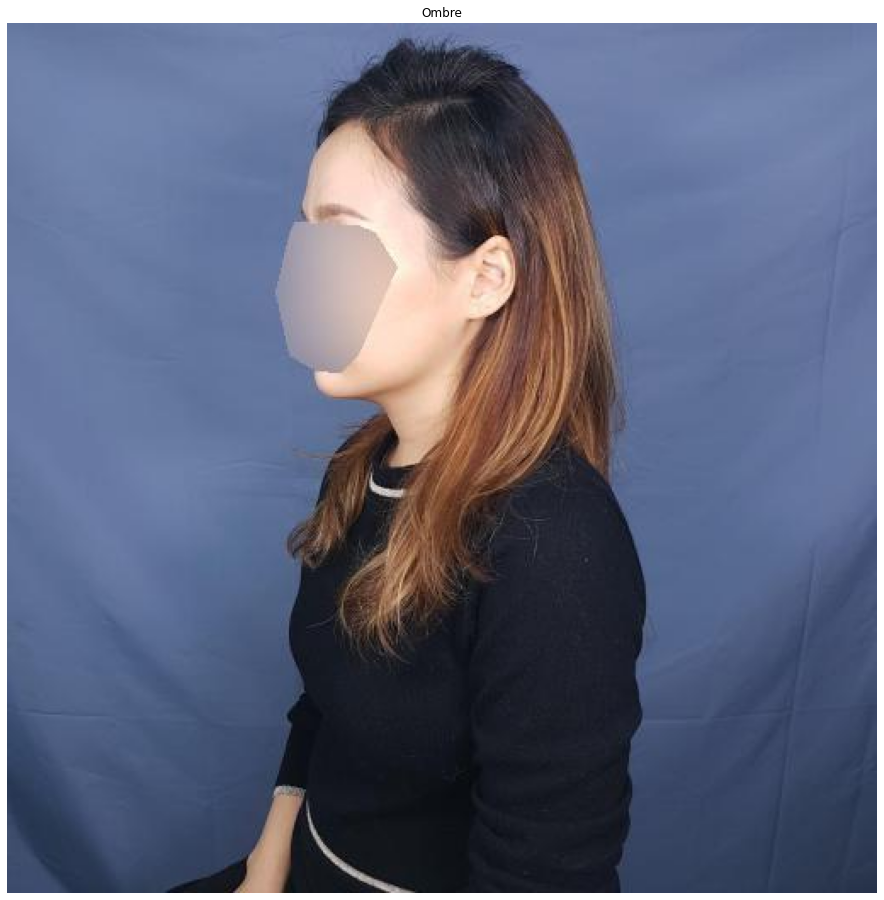

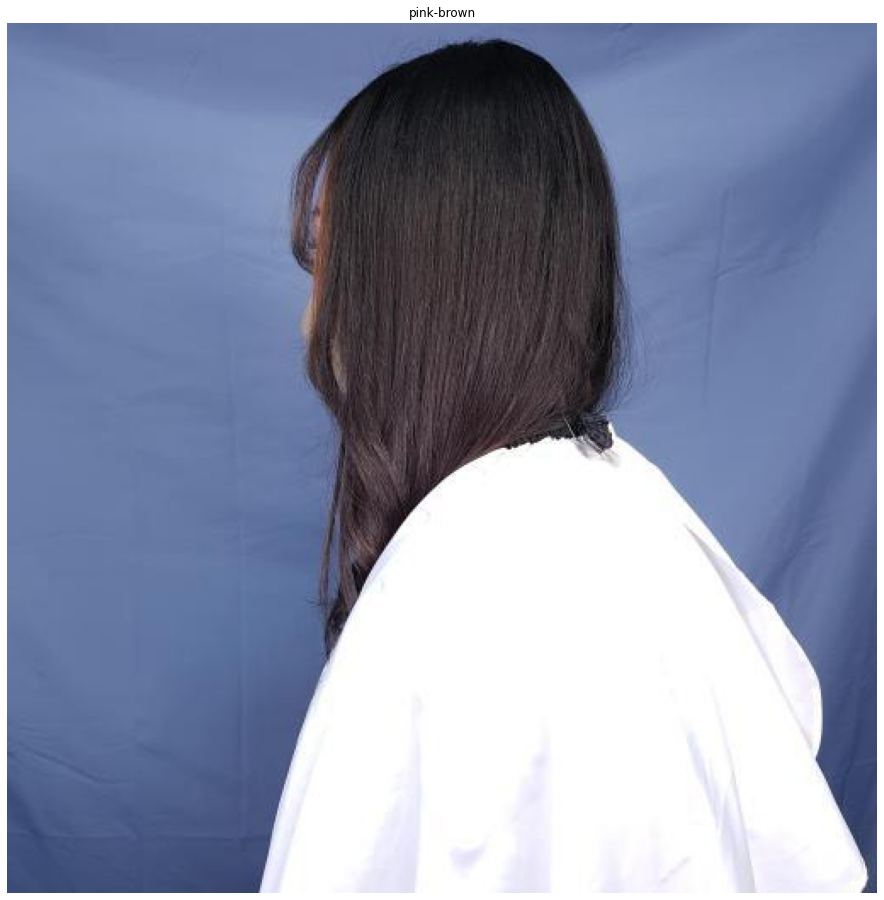

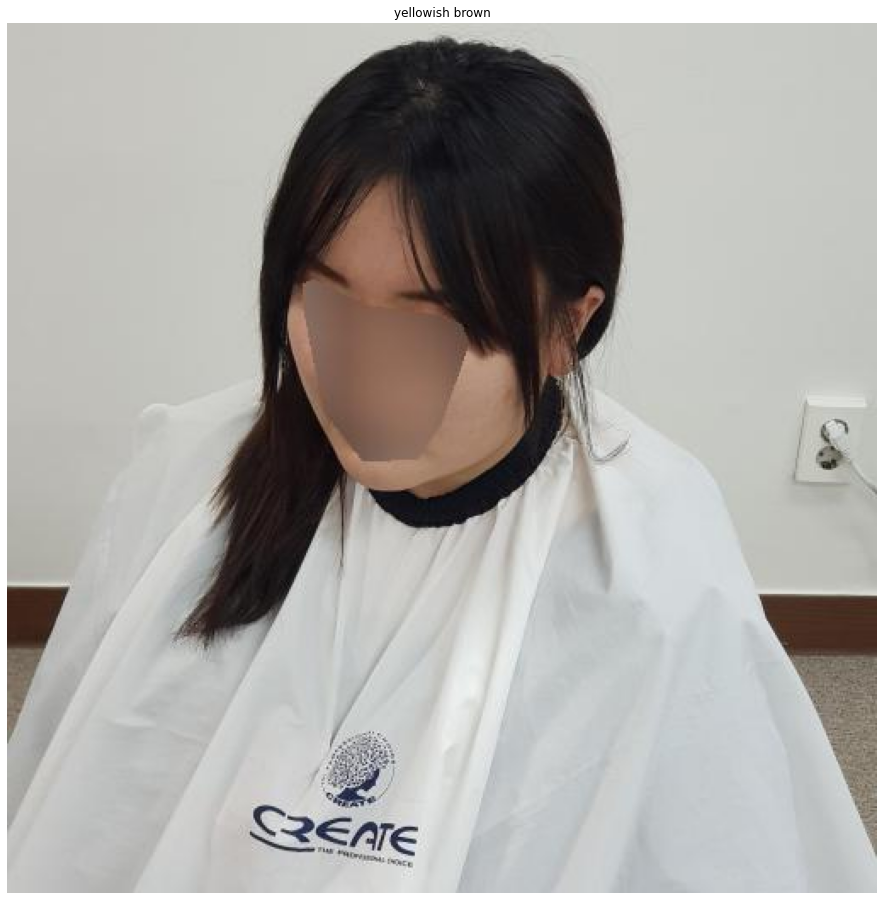

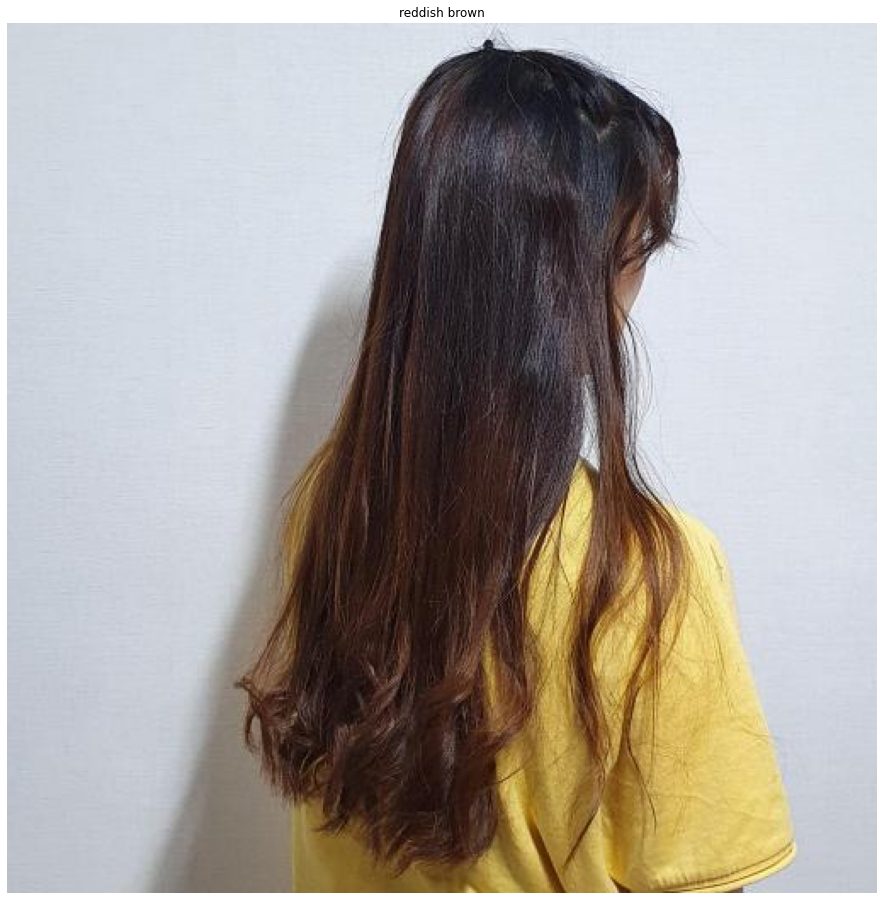

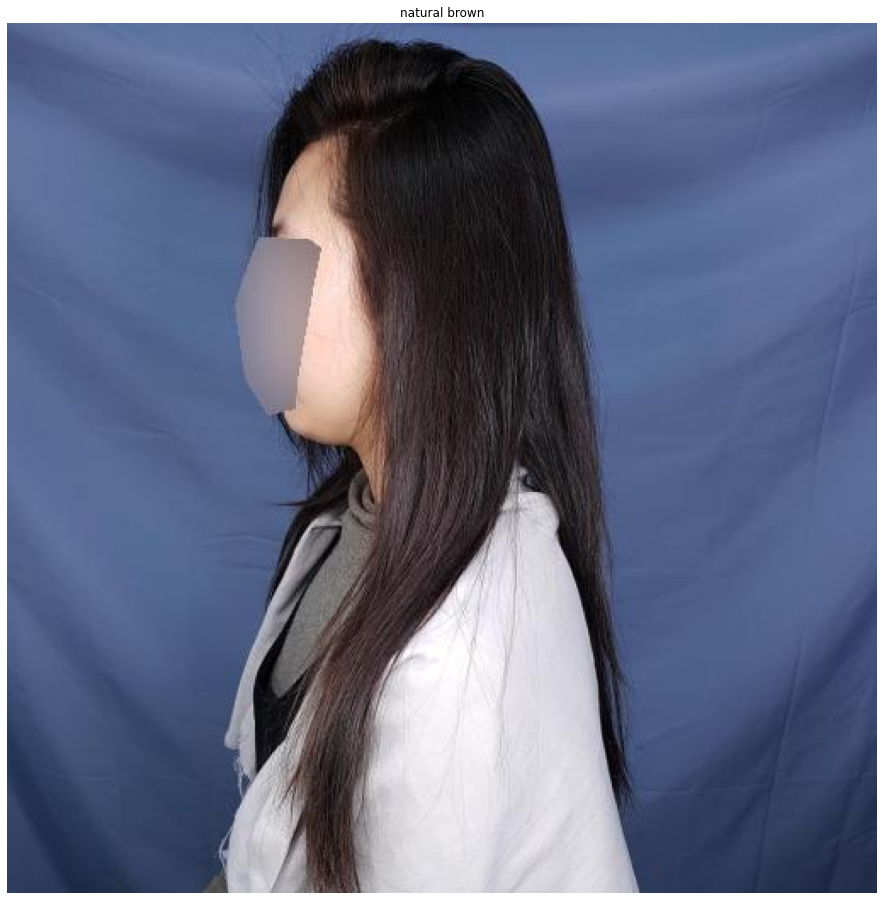

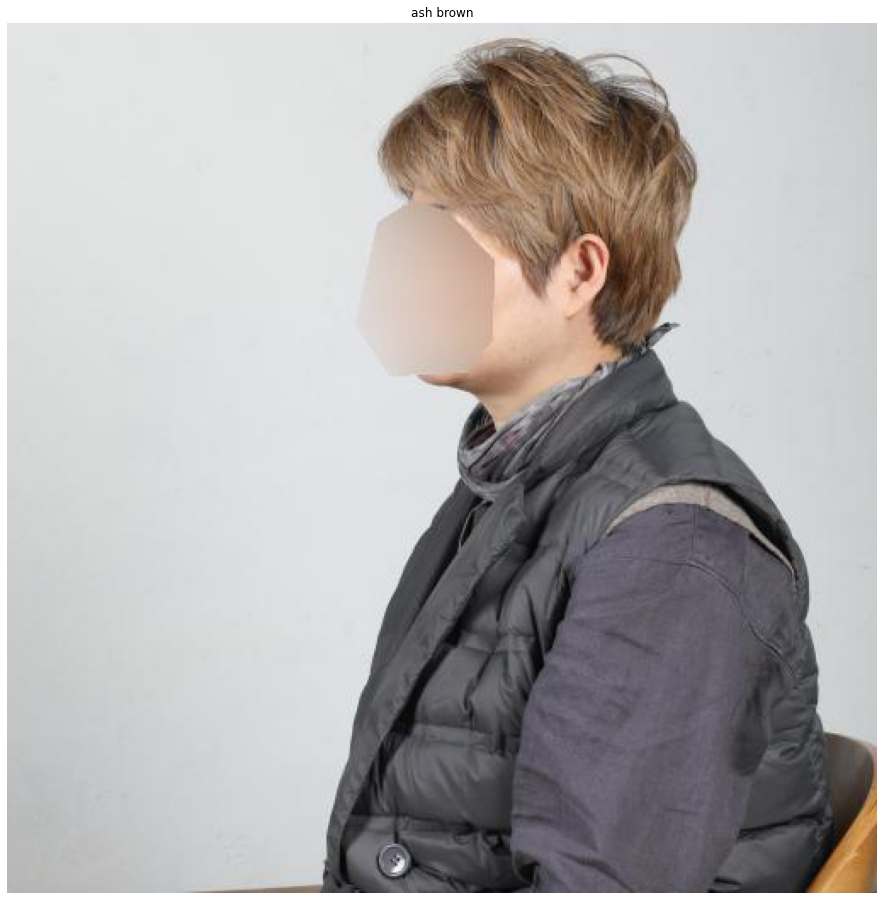

In [113]:
images = []
for color, label in color2idx.items():
    if color in ['others', 'two-tone']:
        continue
    image, path = get_random_image(paths, labels, label, True)
    images.append(image)
    showImagesHorizontally([images[-1]], title=idx2color[label])

In [107]:
def showImagesHorizontally(images, figsize=(16, 16), title=None):
    fig = plt.figure(figsize=figsize)
    for i in range(len(images)):
        a = fig.add_subplot(1, len(images), i + 1)
        image = images[i]
        if title is not None:
            plt.title(title)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [ ]:
def get_random_image(paths, labels, label):
    inds = np.where(labels == label)[0]
    idx = np.random.choice(inds)
    path = paths[idx]
    abs_path = os.path.join(root, path)
    image = Image.open(abs_path).convert('RGB')
    return image


for label in range(len(unique_colors)):
    images = [get_random_image(paths, labels, label) for _ in range(4)]
    showImagesHorizontally(images, title=idx2color[label])